# Cleaning and Analyzing Employee Exit Survey Data

In this project, we'll work with exit surveys from the employees of the [Department of Education, Training, and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and Technical and Further Education (TAFE) institute in Queensland, Australia. 

The DETE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We'll be using both data from both surveys in this project.

### Project Goal

In this project, we want to answer the following questions for our stakeholders:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Column descriptions

Here is a brief description of the variables of interest in the DETE dataset:

-`ID`: An id used to identify the participant of the survey

-`SeparationType`: The reason why the person's employment ended

-`Cease Date`: The year or month the person's employment ended

-`DETE Start Date`: The year the person began employment with the DETE

Here is a brief description of the variables of interest in the TAFE dataset:

-`Record ID`: An id used to identify the participant of the survey

-`Reason for ceasing employment`: The reason why the person's employment ended

-`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Load and explore data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### DETE exploration
Use `df.info()`, `df.head()`, and `df.tail()` to explore the dataset.

Also use `df.isnull()` and `Series.value_counts()` to explore potential irregularities with the data.

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# Count how many values are missing for each column
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Looks like there's a wide range of missing data from a variety of columns. The last few columns are alomst entirely empty/null.

### TAFE exploration

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The columns in this dataset are very long! We'll be cleaning these up later.

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


## Data Cleaning

### Identify Missing Values and Drop Unneccessary Columns

In the DETE dataset, there are some values that read as `Not Stated`, but should be represented as `NaN`. We can set the `na_values` parameter to `Not Stated` in the `pd.read_csv()` function.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

Let's also drop columns from each dataframe that we won't need in our analysis.

In [10]:
# Drop unneccessary columns from DETE
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
# Drop unneccessary columns from TAFE
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

We've removed a lot of extra information from each of our datasets, but there's still a lot to clean from each dataset.

### Cleaning Column Names

Across the two datasets, many of the columns have different names for the same information. Let's standardize these and shorten them and make some other tidying changes.

For now, let's make the following changes to the DETE data:

- Make all capitalization lowercase

- Remove any trailing whitespace from the end of the strings

- Replace spaces with underscores

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+',' ').str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

For the TAFE dataset, the column names are much longer and messier, so let's just create a dictionary that maps replacement names for each problematic column. Note that we will not be fixing all column names in this step.

In [13]:
name_fix={'Record ID':'id',
         'CESSATION YEAR':'cease_date',
         'Reason for ceasing employment':'separationtype',
         'Gender. What is your Gender?':'gender',
         'CurrentAge. Current Age':'age',
         'Employment Type. Employment Type':'employment_status',
         'Classification. Classification':'position',
         'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
         'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'
        }

tafe_survey_updated.rename(columns=name_fix,copy=True,inplace=True)

In [14]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

For the TAFE data, all the column names look better except for those starting with "Contributing Factors".

## Data Filtering

Let's recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Let's only analyze employees who resigned, so their separation type will contain the string `'Resignation'`.

In [15]:
# Check out all unique values in the separation type column in DETE
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

There are 150+91+70=311 employees who resigned in the DETE dataset.

Let's make a copy of this dataset only including employees who resigned. 

Note: Be sure to use the `df.copy()` method to avoid the [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/?_gl=1*177w4qg*_ga*NjIzOTE1MTY4LjE2OTYyNTcxMzg.*_ga_YXMFSKC6DP*MTcwMDYwNDk4Ny4xMDUuMS4xNzAwNjA0OTkxLjU2LjAuMA..*_gcl_au*OTE2NDk1ODEwLjE2OTYyNTcxMzg.)

In [16]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation',regex=False)].copy()
len(dete_resignations)

311

In [17]:
# Check out all unique values in the separation type column in TAFE
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

There are 340 employees who resigned in the TAFE dataset.

Let's again make a copy of this dataset only including employees who resigned.

In [18]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
len(tafe_resignations)

340

### Verify the Data

Let's double check the `cease_date` column for logical inconsistencies. This column should not have any dates later than the current date, and also probably should not have values earlier than 1940.

In [19]:
# Show unique values and count them
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

Some of our data is formatted as MM/YYYY, and some data is formatted as YYYY. We need to extract the year from this column.

In [20]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]
print(dete_resignations['cease_date'].value_counts())

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64


In [21]:
dete_resignations['dete_start_date'].sort_values()

416    1963.0
658    1971.0
503    1972.0
23     1973.0
41     1974.0
        ...  
709       NaN
712       NaN
794       NaN
802       NaN
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

In [22]:
# View the highest values with their counts
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Values in `start_date` range from 2013 to 1963. Looks good.

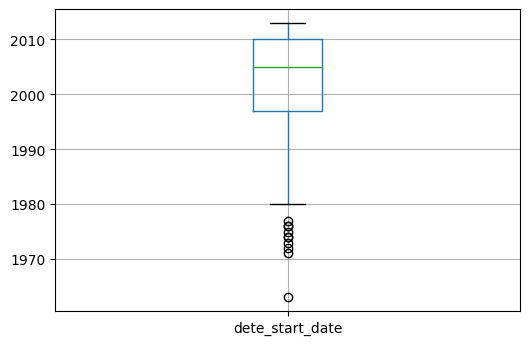

In [23]:
# Visualization of start dates
%matplotlib inline
import matplotlib.pyplot as plt
dete_resignations.boxplot(column='dete_start_date')
plt.show()

The start and end dates all appear to be plausible, although there is some missing data for the DETE start date. 

Let's check out TAFE now.

In [24]:
tafe_resignations['cease_date'].sort_values

<bound method Series.sort_values of 3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
        ...  
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64>

The TAFE `cease_date` dates also look good, ranging from 2010 to 2013.

### Calculate Years of Service

We can calculate how long each employee worked using the `start_date` and `end_date` columns in each dataset.

Let's create a new column called `institute_service` in `dete_resignations` that shows the duration of employment.

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'].astype(float) - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identify Dissatisfied Employees

Now that we've calculated how long each employee has worked, we now need to look at dissatisfaction variables to see how dissatisfaction is related to length of employment.

Let's list all the columns from each dataset that could be related to dissatisfaction:

1. tafe_survey_updated:

* `Contributing Factors. Dissatisfaction`

* `Contributing Factors. Job Dissatisfaction`

2. dete_survey_updated:

* `job_dissatisfaction`

* `dissatisfaction_with_the_department`

* `physical_work_environment`

* `lack_of_recognition`

* `lack_of_job_security`

* `work_location`

* `employment_conditions`

* `work_life_balance`

* `workload`

If any above the above factors caused an employee to resign, we'll mark them as `dissatisfied` in a new column that we'll create below.

To do this, in each dataset we'll look through all columns related to dissatisfaction and see which column, if any, are the cause of resignation.

If any of the columns are `True`, the dissatisfaction column should evaluate to be `True`. If *all* the columns are `False`, the dissatisfaction column should evaluate to `False`. Dissatisfaction will be `NaN` if any of the columns are `NaN`.

In [26]:
tafe_factors=['Contributing Factors. Dissatisfaction',
             'Contributing Factors. Job Dissatisfaction']

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
# update the values in both of these columns to be True, False, or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val=='-':
        return False
    else:
        return True
    
# create new copy of tafe_registrations to avoid copy warning
tafe_resignations_up = tafe_resignations.copy()
    
# make changes to all relevant columns
tafe_resignations_up[tafe_factors] = tafe_resignations[tafe_factors].applymap(update_vals)

# consolidate columns into 'dissatisfied' using 'any()' function
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[tafe_factors].any(axis=1,skipna=True)

tafe_resignations_up['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

Now for DETE data:

In [29]:
dete_factors = ["job_dissatisfaction",
                "dissatisfaction_with_the_department",
                "physical_work_environment",
                "lack_of_recognition",
                "lack_of_job_security",
                "work_location",
                "employment_conditions",
                "work_life_balance",
                "workload"
               ]
# copy
dete_resignations_up = dete_resignations.copy()

#store any True values across columns in 'dissatisfied'
dete_resignations_up["dissatisfied"] = dete_resignations_up[dete_factors].any(axis=1, skipna=False)


### Combine the data

Now that we have 1) the length of employment and 2) whether or not employees left due to dissatisfaction, we can now look at the relationship between these two variables.

Let's combine our DETE and TAFE datasets so we can answer this question across both datasets.

In [30]:
# label each dataset
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [31]:
# let's see if we have any columns with a lot of null values
combined.isnull().sum().sort_values(ascending=False)

torres_strait                                          651
south_sea                                              648
aboriginal                                             644
disability                                             643
nesb                                                   642
business_unit                                          619
classification                                         490
region                                                 386
role_start_date                                        380
dete_start_date                                        368
role_service                                           361
employment_conditions                                  340
ill_health                                             340
study/travel                                           340
relocation                                             340
maternity/family                                       340
lack_of_recognition                                    3

In [32]:
# delete columns with 500 or more null values
combined_updated = combined.dropna(axis=1, thresh = 500)
combined_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.5+ KB


Now we have a succinct dataframe with all the relevant info we need

### Clean the Service Column

The last step we need to do before we can answer our question is to clean up the `institute_service` column because it contains values in a couple of different forms.

In [33]:
# check unique values, including NaN
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


Some values are ranges (3-4 years), some values are text ('More than 20 years'), and some values are decimals.

Let's sort these values into bins:

- New: Less than 3 years at a company

- Experienced: 3-6 years at a company

- Established: 7-10 years at a company

- Veteran: 11 or more years at a company

First we'll need to extract the years of service from `institute_service`.

In [41]:
combined['institute_service'] = combined['institute_service'].astype(str)

# three possible regex patterns, not including NaN
text_pattern = r"^[A-Z]"
range_pattern = r"(^[0-9][-])"
dec_pattern = r"(^[0-9][.])"

combined = combined.copy()
service_strings = combined['institute_service'].str.replace(
    'Less than 1 year','0').str.replace(
    'More than 20 years','20').str.replace(
    '1-2','1').str.replace(
    '3-4','3').str.replace(
    '5-6','5').str.replace(
    '7-10','7')

#combined['institute_service'].str.extract(r'(\d+)')

combined['institute_service'].value_counts(dropna=False)

nan     88
0       73
1       64
3       63
5       33
110     26
5.0     23
1.0     22
7       21
0.0     20
3.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
20      10
8.0      8
13.0     8
20.0     7
15.0     7
12.0     6
10.0     6
14.0     6
22.0     6
17.0     6
18.0     5
16.0     5
11.0     4
23.0     4
24.0     4
21.0     3
19.0     3
32.0     3
39.0     3
26.0     2
25.0     2
28.0     2
36.0     2
30.0     2
31.0     1
41.0     1
27.0     1
35.0     1
29.0     1
42.0     1
49.0     1
33.0     1
38.0     1
34.0     1
Name: institute_service, dtype: int64

Now the column is made up of all numbers (int and float) and some nans. Let's convert these all to strings then extract at least one digit using the `r'(\d+)'` regex.

In [46]:
combined_updated = combined.copy()
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
print(combined_updated['institute_service'])

0        7
1       18
2        3
3       15
4        3
      ... 
646      5
647      1
648    NaN
649      5
650      3
Name: institute_service, Length: 651, dtype: object


In [50]:
def career_stage(col):
    if pd.isnull(col):
        return np.nan
    col = int(col)
    if col < 3:
        return 'New'
    elif col >= 3 and col <= 6:
        return 'Experienced'
    elif col >= 7 and col <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)
print(combined_updated['service_cat'])

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object


Looks good! Now we have an employment length for all employees, except for those with no (NaN) data.

### Initial Analysis

Now we're finally ready to perform our analysis! We can aggregate the values in the `dissatisfied` column, which are Boolean values.

In [51]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [66]:
dissatisfied_service = combined_updated.pivot_table(values='dissatisfied',index='service_cat')
print(dissatisfied_service)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


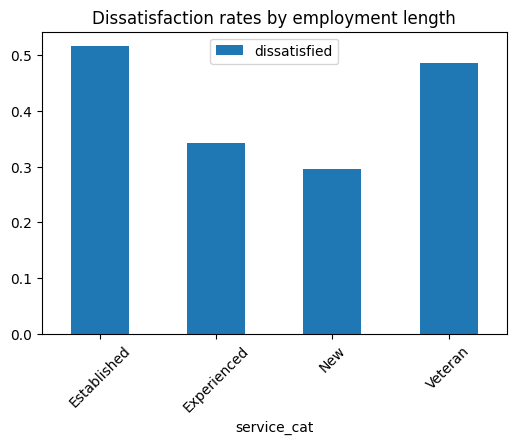

In [65]:
# Plot the results

import matplotlib.pyplot as plt
%matplotlib inline

dissatisfied_service.plot(kind='bar',rot=45,title='Dissatisfaction rates by employment length')

New employees are the least dissatisfied, while established and veteran employees are much more dissatisfied.

### Conclusions

Success! Here's what we demonstrated in this Jupyter Notebook:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the `institute_service` column
- Handled the missing values in the `dissatisfied` column
- Aggregated the data